Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 06: Hough Transform

## Introduction

This week's sheet should be solved and handed in before **14:00 of Tuesday, December 14, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [ ]:
# YOUR CODE HERE

## Assignment 1: Hough transform [7 Points]

**a)** Explain in your own words the idea of Hough transform in general. What is an accumulator space? In what sense can the Hough transform be seen as a model-based approach?

Hough transform is used to find lines in images. A line in the image is transformed into a point in accumulator space $A$. $A$ has two dimensions: A distance $d$ and an angle $\theta$.\
Clusters in $A$ then represent a line in the image.

**b)** What is linear Hough transform? What does a point in the linear Hough space represent? Explain the meaning of the two coordinates.

In linear hough transform $A$ is an array that stores the amount of each $d, \theta$ combination which occurs in the image. If a combination appears several times, it is likely that this line is an actual line in the image.\
A point in the hough space represents a line. $d$ describes the perpendicular distance of the line to the origin and $\theta$ describes the angle between the line and the x-axis.

**c)**  How are points, lines, polygons transformed by linear Hough transform? What about parallel lines? Try different configurations using the functions `point`, `line`, `polygon` below. Use the function `skimage.transform.hough_line` to display these examples. You may use the code of Assignment 2 to check
different configurations interactively.

* A point is transformed into a curve in accumulator space, which describes every possible line that goes through this point.
* A line is transformed into severaly curves, which all intersect in one point in the accumulator space.
* A polygon is transformed into many curves, intersect in different points in the accumulator space. There are as many intersections as there are lines in the image.
* Parallel lines have a intersection in accumulator space at the same angle $\theta$, but at different distances $d$.

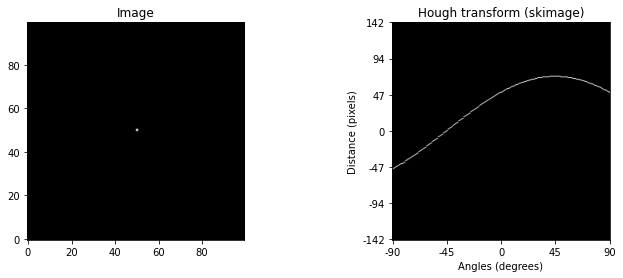

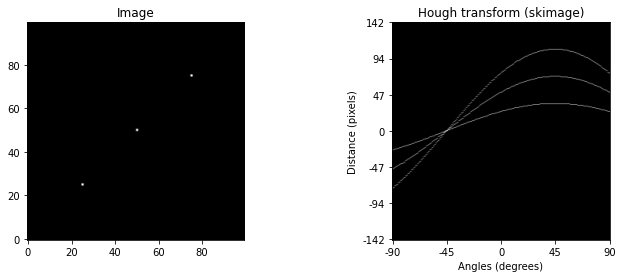

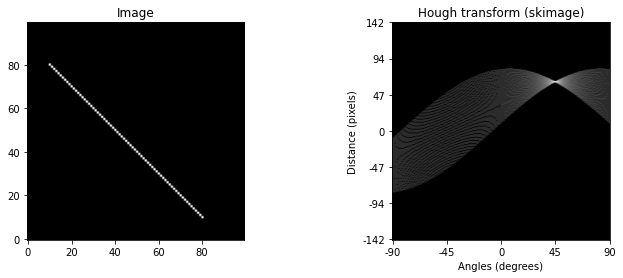

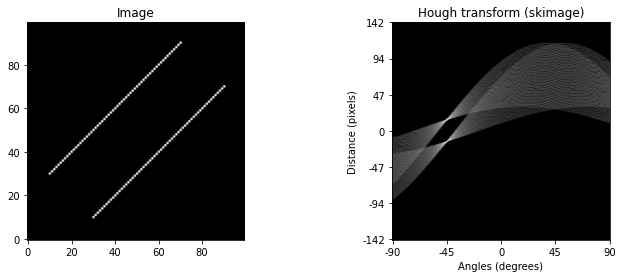

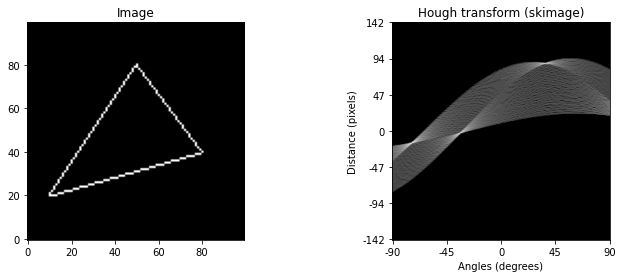

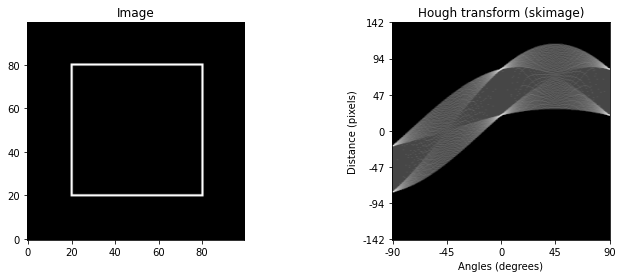

In [3]:
from skimage.transform import hough_line
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p] = 1

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)

img = np.zeros((100,100))
img1 = np.zeros((100,100))
img2 = np.zeros((100,100))
img3 = np.zeros((100,100))
img4 = np.zeros((100,100))
img5 = np.zeros((100,100))
img6 = np.zeros((100,100))

images = [img1, img2, img3, img4, img5, img6]

# YOUR CODE HERE
point(img1, (int(img.shape[0]/2), int(img.shape[1]/2)))

point(img2, (int(img.shape[0]/2), int(img.shape[1]/2)))
point(img2, (int(img.shape[0]/4), int(img.shape[1]/4)))
point(img2, (int(3 * img.shape[0]/4), int(3 * img.shape[1]/4)))

line(img3, (80, 10), (10, 80))

line(img4, (30, 10), (90, 70))
line(img4, (10, 30), (70, 90))

polygon(img5, [(20,10), (80,50), (40,80)])

polygon(img6, [(20,20), (20,80), (80,80), (80,20)])

for img in images:
    fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

    plt.gray()
    ax1.set_title('Image'); 
    ax1.imshow(img, origin = 'lower')

    out, angles, d = hough_line(img)

    # scale output to quadratic image
    out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
    ax2.set_title('Hough transform (skimage)');
    ax2.set_xlabel('Angles (degrees)')
    ax2.set_ylabel('Distance (pixels)')
    ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')

    ax2.set_yticks(np.linspace(0, out.shape[0], 7))
    ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
    ax2.set_xticks(np.linspace(0, out.shape[0], 5))
    ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))


plt.show()

## Assignment 2: Interactive Hough transform [1 Point] 

The following code block implements an interactive Hough transform, in which you can either draw points or lines and can see the resulting Hough transform immediately. Draw different shapes of points or lines and check the resulting Hough transform. Try to predict the outcome of the transformation!

<IPython.core.display.Javascript object>


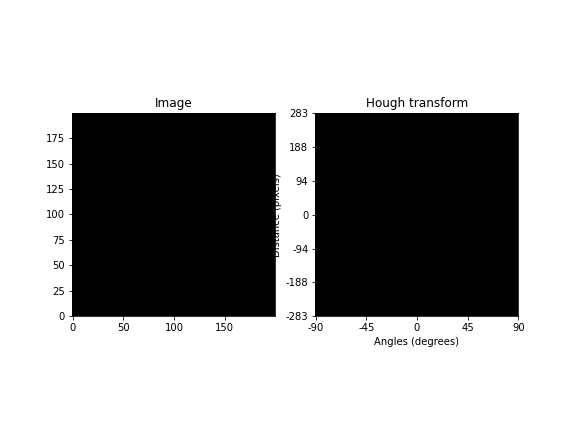

9

In [4]:
%matplotlib notebook
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np

# True if two mouse clicks should draw a line, false if single clicks draw points
lines = True


steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])
img = np.zeros((200,200))


def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1
    

def disp_and_comp():
    """Computes Line Hough transform; displays image and result
    
    Args:
    
    Returns:
    
    """
    ax1.imshow(img, origin = 'lower', cmap='gray')
    
    out, angles, d = hough_line(img)
    
    out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
    ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
    ax2.set_yticks(np.linspace(0, out.shape[0], 7))
    ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
    ax2.set_xticks(np.linspace(0, out.shape[0], 5))
    ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))
    
    fig.canvas.draw()

    
first_point = True
p1 = (0,0)
def on_press(event):
    """Draws either line or point and calls disp_and_comp
    
    Reacts to mouse clicks. Draws either point at mouse
    position and computes Hough transform or draws line
    between first and second mouse click and then computes
    hough transfom.
    
    Args:
        event (event): Mouseevent.
    
    Returns:
    
    """
    global p1, first_point
    y = int(event.xdata)
    x = int(event.ydata)
    
    if (lines):
        if (first_point):
            p1 = (x,y)
            img[x, y] = 255
            first_point = False
        else:
            line(img,p1,(x,y)) 
            first_point = True
        disp_and_comp()
    else:
        img[x, y] = 255
        disp_and_comp()
    
    

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(121)
plt.title('Image')

ax2 = fig.add_subplot(122)
plt.title('Hough transform');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')


disp_and_comp()
#plt.axis('square')
fig.canvas.mpl_connect('button_press_event', on_press)

# YOUR CODE HERE

## Assignment 3: Implementing Hough transform [7 Points]

**a)** Implement your own version of linear Hough transform and compare the results with the function `skimage.transform.hough_line`.

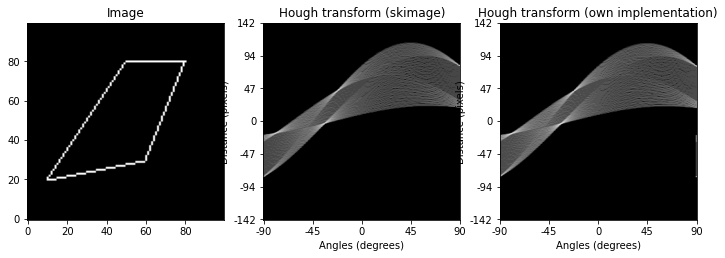

In [5]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

def my_hough_line(img, angles=180):
    """
    Apply linear Hough transform to the given image.
    
    Args:
        img (numpy.ndarray): The binary image to transform
        angles (int): The number of angles to consider.
    Result:
        accumulator (numpy.ndarray): The accumulator space.
    """
    # YOUR CODE HERE
    accumulator = np.zeros((285, angles))
    step = 180 / angles

    # iterate through every pixel
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            # if the pixel is not zero do hough transform on this pixel
            if img[y][x]:
                # compute the distance r for every angle
                i = -90     # For the correct output, i has to be in range [-90, 90]
                while i <= 90:
                    # angle has to be in radian
                    theta = math.radians(i)
                   
                    # compute distance r
                    r = round(x * math.cos(theta) + y * math.sin(theta))
                    # Correction for r for the correct output
                    r += 142
                    # increment the corresponding accumulator
                    accumulator[r][int(i) + 89] += 1
                    
                
                    i += step
    return accumulator


img = np.zeros((100,100))

# You may try different paintings here:
#point(img, (10,10))
#line(img,(10,20),(70,20))
polygon(img,[(20,10),(80,50),(80,80),(30,60)])


fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
plt.gray()

# original image
ax1.set_title('Image'); 
ax1.imshow(img, origin = 'lower')

# skimage
out, angles, d = hough_line(img)

out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax2.set_title('Hough transform (skimage)');
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax2.set_yticks(np.linspace(0, out.shape[0], 7))
ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax2.set_xticks(np.linspace(0, out.shape[0], 5))
ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

# own implementation
my_out = my_hough_line(img)

my_out_resized = resize(my_out, (my_out.shape[0], my_out.shape[0]), anti_aliasing=True, preserve_range=True)
ax3.set_title('Hough transform (own implementation)');
ax3.set_xlabel('Angles (degrees)')
ax3.set_ylabel('Distance (pixels)')
ax3.imshow(np.log(1 + my_out_resized), origin = 'lower', cmap='gray')

ax3.set_yticks(np.linspace(0, my_out.shape[0], 7))
ax3.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax3.set_xticks(np.linspace(0, my_out.shape[0], 5))
ax3.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

plt.show()


**b)** Under which conditions is (linear) Hough transform invertible? Try to implement an inverse linear Hough transform. 

You could create a line for each point in accumulator space by doing the following: Compute angle and distance of the line represented by the current point in accumulator space. Add the value of this point to all image pixels which belong to the corresponding line. Finally you could threshold the image. 

However, other solution are feasible, too.


By looking at the HT we can find the position and the angle of the lines that are in the image. But there is no information about where the lines start or end. So we need to know the shape of the original image.
Without this information the HT is not invertable.

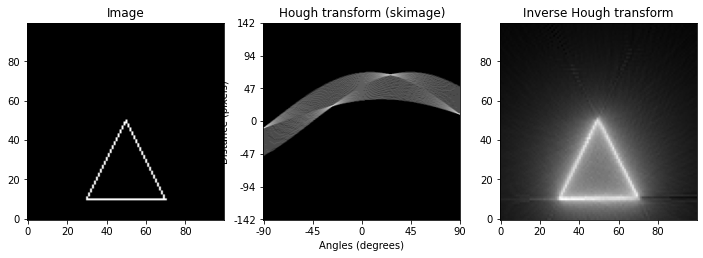

In [28]:
%matplotlib inline 
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np


# YOUR CODE HERE

def my_inverse_hough_line(accumulator, shape):
    """Compute an inverse Hough transform, i.e. compute the image from the accumulator space.
    
    Args:
        accumulator (numpy.ndarray)
        shape (tuple): The shape (dimensions) of the image to be created

    Result:
        img (numpy.ndarray): The image created from the accumulator space.
    """
    # This algorithm computes every possible line in 180° in steps of 1° for every pixel
    # and then adds the value in the accumulator space to this pixel
    img = np.zeros(shape, np.uint64)
    
    # YOUR CODE HERE
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            
            i = -90
            while i <= 90:
                
                theta = math.radians(i)
                   
                r = round(x * math.cos(theta) + y * math.sin(theta))
                r += 142
            
                img[y][x] += accumulator[r][int(i) + 89]
                
                i += 1
  
    return img

img = np.zeros((100,100))

#point(img, (10,10))
#line(img,(10,20),(70,20))
#line(img,(20,10),(20,70))
polygon(img,[(10,30),(50,50),(10,70)])

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax = plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
ax.set_title('Hough transform (skimage)');
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
ax.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax.set_yticks(np.linspace(0, out.shape[0], 7))
ax.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax.set_xticks(np.linspace(0, out.shape[0], 5))
ax.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

img2 = my_inverse_hough_line(out, img.shape)
plt.subplot(1,3,3) ; plt.title('Inverse Hough transform');
plt.imshow(img2, origin = 'lower')
plt.show()


## Assignment 4: Circular Hough [7 Points]

**a)** Explain the idea of circular Hough transform. How many dimensions does the accumulator space have and what do they represent? What practical problems do you expect when computing circular Hough transform?

* In circular hough transform the goal is to find circles in a picture. At first the egdes of the image have to be computed. Now, for every edge pixel draw a circle with radius $r$ around the edge pixel and increment the counter of every pixel, which is hit by the circle.
* If a circle with radius $r$ exists in the image, the circles around the edge pixels of this circle will intersect in one point, the center of the circle in the image. Therefore, center pixels are peaks in the accumulator space.
* The accumulator space has the dimension $(x,y,r)$, where $x$ and $y$ are the coordinates of the circles center and $r$ is the radius. 
* Since the accumulator space is three-dimensional, the computation time is increased significantly. If the radius of the searched circle is known or can be approximated, it is possible to reduce the computation time.

**b)** Now implement circular hough transform. First think how the accumulator space should be represented. You may provide an additional parameter to only look for circles of a given radius (or a range of radii). Then apply it to the image `xmas.png` to detect the balls. Mark them in the original image. (Bonus task: also detect the presents using linear Hough transform).

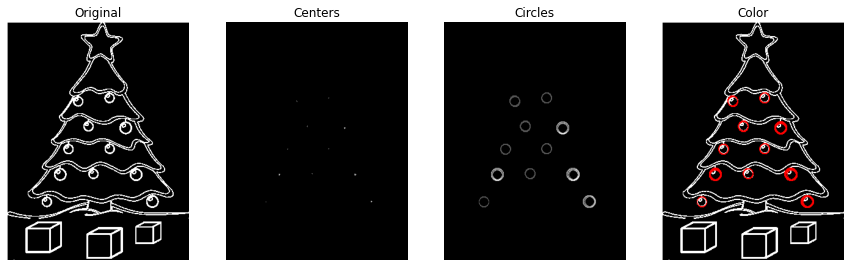

In [30]:
%matplotlib inline
from skimage.transform import hough_line
from scipy import misc
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import math

# load the image
img = imread('images/xmas.png')


# YOUR CODE HERE
def my_circular_hough(img, radius, angle):
    """Compute the circular hough transform
    
    Args:
        img (numpy.ndarray): The image that is getting transformed
        r (int or tuple): The radius or range of radius of circles to look for
        angle (int): Circle will be computed in 360/angle steps

    Result:
        accumulator (numpy.ndarray): The accumulator space 
    """
    
    step = int(360 / angle)
    
    accumulator = np.zeros(img.shape)
    
    # go through every pixel in every radius which represents a circle center at (xc, yc)
    for yc in range(img.shape[0]):
        for xc in range(img.shape[1]):
            
            # For every edge pixel
            if img[yc][xc]:
                # Increment every pixel on the circle in 360° 
                theta = 0
                while theta < 360:
                    # formulas for points on the circle at angle theta
                    y = round(yc + radius * math.cos(math.radians(theta)))
                    x = round(xc + radius * math.sin(math.radians(theta)))
                        
                    if 0 <= y < accumulator.shape[0] and 0 <= x < accumulator.shape[1]:
                        accumulator[y][x] += 1
                        
                    theta += step
                    
    
    return accumulator
 
    
    

def get_centers(acc, threshold):
    """ Find the centers of a circle by marking every pixel in an accumulator that 
        has more votes than a given threshold
        
    Args:
        acc: The accumulator array
        threshold: The threshold which marks the peaks in the accumulator space
    Result:
        center_img: An image where the found centers are = 1
    """
    center_img = np.zeros(img.shape)

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if acc[row][col] >= threshold:
                center_img[row][col] = 1
    return center_img   


# Draw the circles around the found centers
def get_circles(center_img, r):
    """ Draw circles with a given radius around the given center pixel 
    
    Args:
        center_img: The image with the center pixels
        r: The radius of the circles
    Result:
        circle_img: The image containing the circles
    """
    circle_img = np.zeros(img.shape)
    
    for yc in range(img.shape[0]):
        for xc in range(img.shape[1]):

            if center_img[yc][xc]:
                for theta in range(0, 360, 4):
                    y = round(yc + r * math.cos(math.radians(theta)))
                    x = round(xc + r * math.sin(math.radians(theta)))

                    if 0 <= y < circle_img.shape[0] and 0 <= x < circle_img.shape[1]:
                        circle_img[y][x] = 1

    return circle_img  


# Color the circles in the original image
def get_colored_img(img, circle_img):
    """ Mark the given circles in the original image
    
    Args:
        img: The original image
        circle_img: The image containing the circles
    Result:
        color_img: The original image with the found circles colored
    """
    color_img = np.zeros((img.shape[0], img.shape[1], 3))

    # Mark the circles in the original images
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if circle_img[y][x]:
                color_img[y][x] = [1,0,0]

            if img[y][x] and not color_img[y][x].any():
                color_img[y][x] = [1,1,1]
    return color_img
    
    
r = 8               # A radius of 8 is detecting every ball in the original image
angles = 180        # An angle of 180 is more than enough
threshold = 140     # Threshold of 130 works well (threshold = votes in accumulator space needed to be considered as peak)

# Initialize the accumulator space
acc = np.zeros(img.shape)

# Initialize an array which will contain the found circles
circle_img = np.zeros(img.shape)

# Initialize an array which will contain all found centers
total_center_img = np.zeros(img.shape)

# Find circles (and centers) for radius = 8, 9, 10
for r in range(8, 11):
    acc = my_circular_hough(img, r, angles) 
    center_img = get_centers(acc, threshold)
    total_center_img += center_img
    circle_img += get_circles(center_img, r)
    
# Mark the found circles in the original image
color_img = get_colored_img(img, circle_img)


plt.figure(figsize=(15,15))

plt.gray()
plt.subplot(1,4,1)
plt.title("Original")
plt.axis('off')
plt.imshow(img)

plt.gray()
plt.subplot(1,4,2)
plt.title("Centers")
plt.axis('off')
plt.imshow(total_center_img)

plt.gray()
plt.subplot(1,4,3)
plt.title("Circles")
plt.axis('off')
plt.imshow(circle_img)

plt.subplot(1,4,4)
plt.title("Color")
plt.axis('off')
plt.imshow(color_img)

## Assignment 5: Application: Eye detection [Bonus]

**Bonus:** If you do this exercise, you may leave out one of the others.

**a)** It was suggested in the lecture, that circular Hough transform can be used to implement a simple
form of “eye tracking”. Try this using your webcam.

Hints:
* You may start with a single snapshot (or some other image of a face from wherever you like) before applying your function to a video stream.
* You may start using functions like `hough_circle` from `skimage.transform`, which implement circular Hough transform.
* You may try to apply some preprocessing to detect edges or regions prior to Hough transform (you may use anything you know from the lecture).
* `hough_circle` may be inappropriate, as it is designed to detect full circles, while eyes are often partially occluded. You may implement your own Hough transforms, which detects this kind of incomplete circles.
* You may apply additional knowledge to detect eyes, e.g. that they usually occur in pairs. You may also use the approximate size and position from last frame.

In [ ]:
# imageio
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio
import numpy as np
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter

# we use visvis for a bit better performance compared to matplotlib
import visvis as vv


# List of radii we compute hough transform for. Ideally we adjust for the perfect radius.
hough_radii = [10]
    
def detect_eyes(img):
    """Find pairs of eyes in image based on circular Hough transform.
    
    Args:
        img (ndarray): The RGB input image to detect the eyes in. shape=(h, w, 3)
        
    Returns:
        ndarray: The image with detected eyes highlighted.
    
    """
    # YOUR CODE HERE

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        t = vv.imshow(webcam.get_next_data(), clim=(0, 255))

        while True:
            img = webcam.get_next_data()
            vv.processEvents()
            # subsample the image also for performance
            detect_eyes(img[::2,::2,:])
            t.SetData(img)
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")
    